# Training a Simple CNN

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from data.image_dataset import ImageDataset
from models.cnn import CNN
from models.nvgaze import NVGaze
from training.train import *
from training.eval import *
from data.convert_labels import *
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
data_subset = '01_20_160_120'

train_dir_path = f'data/real/{data_subset}/train'
train_annotations_file_path = f'{train_dir_path}/{data_subset}_train.csv'
val_dir_path = f'data/real/{data_subset}/val'
val_annotations_file_path = f'{val_dir_path}/{data_subset}_val.csv'
test_dir_path = f'data/real/{data_subset}/test'
test_annotations_file_path = f'{test_dir_path}/{data_subset}_test.csv'

# Can override arguments specifying class boundaries
# target_transform = lambda target: convert_labels(target)
target_transform = lambda target: torch.tensor(target).to(torch.float32)

train_dataset = ImageDataset(
  annotations_file=train_annotations_file_path,
  img_dir=train_dir_path,
  transform=None,
  target_transform=target_transform
)
val_dataset = ImageDataset(
  annotations_file=val_annotations_file_path,
  img_dir=val_dir_path,
  transform=None,
  target_transform=target_transform
)
test_dataset = ImageDataset(
  annotations_file=test_annotations_file_path,
  img_dir=test_dir_path,
  transform=None,
  target_transform=target_transform
)

In [3]:
# Create Dataloader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 120, 160])
Labels batch shape: torch.Size([64, 2])


In [4]:
# model = CNN(input_dims=(160, 120))
model = NVGaze(input_dims=(160, 120), out_features=2)
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Set-up GPU device (if available) and move model
device = torch.device('mps' if torch.mps.is_available() else 'cpu')
model = model.to(device)
print(f'Using device: {device}')

results = train(model, criterion, optimizer, device, train_loader, val_loader, epochs=200)

torch.Size([1, 40, 4, 2])
Using device: mps


(0.0, 0.2)

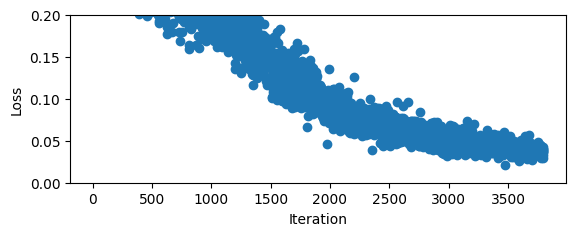

In [15]:
# loss_history, train_acc_history, val_acc_history = results
loss_history = results
plt.subplot(2, 1, 1)
plt.plot(loss_history, 'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim(0,0.2)

# plt.subplot(2, 1, 2)
# plt.plot(train_acc_history, '-o')
# plt.plot(val_acc_history, '-o')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.show()

In [18]:
# test_acc = evaluate_acc(model, device, test_loader)
# print(test_acc)

test_error = evaluate_error(model, device, test_loader)
print(test_error)

0.054874204099178314
0.04545509070158005
0.07001800835132599
tensor(0.2850, grad_fn=<DivBackward0>)
